## **The sentiment analysis of an IMDB review**

I am going to perform **sentiment analysis** on an **IMDB reviews** of a movie **'The Lord of the Rings: The Fellowship of the Ring'**. The classic movie directed by Peter Jackson in the year of 2001 is widely considered one of the best movies of all-time and as a medium this well-loved it serves as a good basis for conducting any types of sentiment analyses

# **The purposes it may serve**

The main and the most logical purpose a sentiment analysis could serve, is **detecting the general emotional nature of a piece of media**. With its' help, one could potentially be able to pinpoint the tone of a message - whether it was **positive**, **negative** or **neutral**. At times it is not as simple to do so, and so the automatisation of the process may help greatly. (Hamborg and Karsten 2021)
Moreover, it is just simply interesting to consider, what results granted in these studies may turn out to be.

## **Hypothesis**

Modern computing tools are able to perform the action **astonishingly** well. With the amount of data that has been put into these computing devices over the course of the years, it became exceptional at detecting and evaluating the true intentions behind **even the most convoluted statements**.
In this particular instance our purpose is to analyse the sentiment behind the review in question to examine in order to prove, that the sentiment in question is, in fact, **positive**.

## **Methodology** and the **process** itself

For the matter to be put in the proper perspective, the most significant steps of the research are going to be explained **below**.

**A) BEAUTIFUL SOUP** is a useful library of Python, which allows us to parse documents in HTML. **B) SENTIMENT INTENSITY ANALYSER** is a tool, which serves a purpose that is suggested in the name itself. And **C) REQUESTS** is a module, that allows one to extract desired data from the source used. These tools will help us achieve the goal intended.

The following code is the gathering of data:

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.imdb.com/title/tt0120737/reviews?ref_=tt_urv'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

reviews = []
review_elements = soup.find_all('div', class_='text show-more__control')
for element in review_elements:
    review = element.text.strip()
    reviews.append(review)

df_reviews = pd.DataFrame(reviews, columns=['Review'])

The following code is the way of preprocessing the data given:

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Tokenize
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens_lower = [token.lower() for token in tokens]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    tokens_filtered = [token for token in tokens_lower if token not in stopwords_set and token not in string.punctuation]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens_filtered)
    return preprocessed_text

df_reviews['Cleaned Review'] = df_reviews['Review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now it's time to do the sentiment analysis of the training data:

In [9]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

nltk.download('movie_reviews')

# Load the movie reviews corpus
reviews = [(movie_reviews.raw(fileid), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
review_texts = [review[0] for review in reviews]
review_labels = [review[1] for review in reviews]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(review_texts, review_labels, test_size=0.2, random_state=42)

# Preprocess the training set
preprocessed_X_train = [preprocess_text(text) for text in X_train]

# Vectorize the preprocessed training set using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(preprocessed_X_train)

# Train a support vector machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Preprocess the test set
preprocessed_X_test = [preprocess_text(text) for text in X_test]

# Vectorize the preprocessed test set using the same vectorizer
X_test_vectorized = vectorizer.transform(preprocessed_X_test)

# Predict the sentiment labels of the test set
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the classifier
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       199
         pos       0.83      0.83      0.83       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Accuracy: 0.825


Accuracy = 82.5% which is rather high.

Now I will conduct the sentiment analysis on the gathered reviews.

In [10]:
preprocessed_scraped_reviews = [preprocess_text(text) for text in df_reviews['Review']]
scraped_reviews_vectorized = vectorizer.transform(preprocessed_scraped_reviews)
scraped_reviews_pred = svm_classifier.predict(scraped_reviews_vectorized)

df_reviews['Sentiment'] = scraped_reviews_pred
df_reviews['Sentiment'] = df_reviews['Sentiment'].map({'neg': 'Negative', 'pos': 'Positive'})

Now it would be good to visualise the results of the research previously conducted:

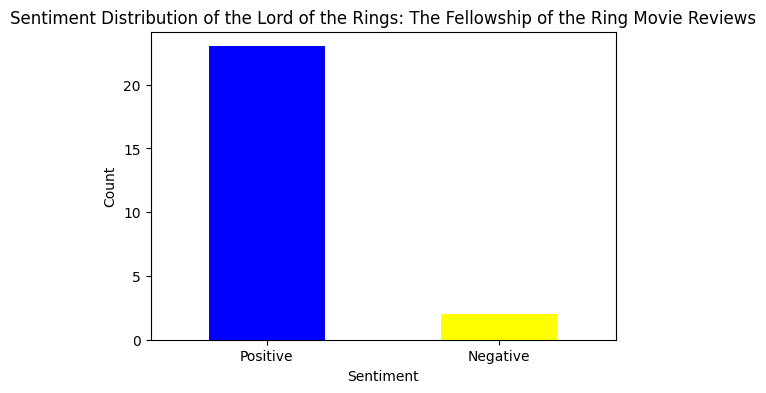

In [12]:
import matplotlib.pyplot as plt

sentiment_counts = df_reviews['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['blue', 'yellow'])
plt.title('Sentiment Distribution of the Lord of the Rings: The Fellowship of the Ring Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## **Conclusion**

Overall the sentiment is positive and granted the movie is generally considered a cult classic, in a way this was to be expected.